# Lecture 11: Global Search Methods, part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction

from func import Func
from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

plt.rc('animation', html='jshtml')

utils.load_custom_styles()

---
## Preliminary

### Global vs Local Optimum
 - Global Optimum is the input to an objective function that yields the highest/lowest function value. A global optimimum is **not necessarily unique**. There can be multiple global optima that yield the same function value.
 - Local Optimum is the input to an objective function that yields the highest/lowest function value in a local neighbourhood. A saddle point is not local optimum.

### Global vs Local Optimisation:
- Global optimisation algorithms have built-in mechanisms that allow them to escape local minima. However, global optimisation algorithms do not gurantee to find the global optimum. There are few global methods that gurantee to find the global optimum but they take *very very* long time to compute.
- Local optimisation algorithms find local optima only. They might find global optimum but this depends on the starting point. They have no way of getting out of local minima but they tend to be fast. They perform local search i.e., at each step the algorithm picks a solution candidate from a local "neighbourhood" of candidate solutions. The next candidate is somehow related to current candidate. 

Neighbourhood can be loosely defined as where we are right now and where we want to go.

### Deterministic vs Stochastic Algorithm:
- Deterministic: given the same input, the algorithm will always produce the same output. There is no randomness when the algorithm searches for an optimimum. 
- Stochastic: given the same input, the algorithm may produce different outputs. These algorithms add some randomness to the search, e.g. by randomly selecting from neighbourhood of candidate solutions. What are the benefits stochastic algorithms? Well, for one they are easier to implement. Adding randomness to the search is sometimes faster and more robust. In addition, it is one mechanism to get out of an local optimum. However, some researchers disagree! There is no real concensus whether stochastic methods are better than deterministic ones. 

A deterministic algorithm like Newton's method depends on the starting point. In principle, we can run the algorithm with randomly generated starting points.

<div class="warning">
Pseudo-random numbers are not really random numbers. The random number generator is seeded which means that generator allows us to start the random sequence at some point. Typically, it is seed using the current timestamp. Notice that the seed is not part of the input of the algorithm.
</div>

### Discrete vs Continuous Optimisation
Discrete vs Continuous Optimisation Task: the input to the objective function determines whether the optimisation task is discrete or continuous. When the input space is finite then we have a discrete optimisation, otherwise we have a continuous.

---
## Introduction

The iterative algorithms in previous chapters, in particular gradient methods,
Newton's method, conjugate gradient methods, and quasi-Newton methods,
start with an initial point and then generate a sequence of iterates. Typically,
the best we can hope for is that the sequence converges to a local minimizer.
For this reason, it is often desirable for the initial point to be close to a global
minimizer. Moreover, these methods require first derivatives (and also second
derivatives in the case of Newton's method).

In this lecture we discuss various search methods that attempt to search throughout the entire feasible set:

- They use only objective function values and do not require derivatives. Consequently, they are applicable to a much wider class of optimization problems.

- In some cases, they can be used to generate "good" initial (starting) points for the iterative methods discussed previously.

- Some of the methods (specifically, the **randomized search methods**) are also used in combinatorial optimization, where the
feasible set is finite (discrete), but typically large.

---
## Randomised Search Methods

A randomized search method, also sometimes called a **probabilistic search method**,  is an algorithm that searches the feasible set $\Omega$ of an optimization problem by considering randomized samples of candidate points in the set.


The optimisation problem that we want to solve has the form:

<img src="figures/lecture-11/constrained-min-problem.png" width="600" />



For any $\mathbf{x} \in \Omega$, we assume there exist a 
set $N(\mathbf{x}) \subset \Omega$ (subset) from which we can generate
a random sample. 

Typically, $N(\mathbf{x})$ is a set of points that are "close" to $\mathbf{x}$, 
and for this reason we usually think of $N(\mathbf{x})$ as a "neighborhood"
of $\mathbf{x}$. We use the term **neighborhood** for $N(\mathbf{x})$ even 
in the general case where the points in it are arbitrary, not necessarily 
close to $\mathbf{x}$.

When we speak of generating a random point in $N(\mathbf{x})$, we mean that
there is a prespecified distribution over $N(\mathbf{x})$, and we sample a 
point with this distribution. Often, this distribution is chosen to be uniform 
over $N(\mathbf{x})$; other distributions are also used, including Gaussian
and Cauchy.

---
### Naive Random Search Algorithm

A naive random search algorithm whould like this:

1. Set $k := 0$. Select an initial point $\mathbf{x}^{(0)} \in \Omega$. Typically, the initial point is selected randomly.

2. Select a next-candidate point $\mathbf{z}^{(k)}$ at random from $N\left(\mathbf{x}^{(k)}\right)$. 
    
3. If $f\left(\mathbf{z}^{(k)}\right) < f\left(\mathbf{x}^{(k)}\right)$ then 
   set $\mathbf{x}^{(k+1)} := \mathbf{z}^{(k)}$; otherwise $\mathbf{x}^{(k+1)} := \mathbf{x}^{(k)}$
   
4. If stopping criterion is satisfied, then stop.

5. Set $k := k + 1$, go to step 2.
   



The algorithm has the familiar form:
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{d}^{(k)}
$$

where $\mathbf{d}^{(k)}$ is randomly generated. By design, the direction $\mathbf{d}^{(k)}$  is either $\mathbf{0}$ or a descent direction.

----
#### In-Class Pseudo Code


    x_k = initial_point

    for i in range(100):
        # Notice that the RANDOM is a red herring

        z = NEIGHBOUR(x_k) 

        # If we don't find any improvement in the cost
        # in a number of iterations, then stop

        if COST(z) < COST(x_k):
            x_kp1= z
        else
            x_kp1 = x_k

---
### Issues with Naive Random Search Algorithm

The main problem with the naive random search method is that it may get stuck in a region around a local minimizer.

Here is an example where the algorithm may get stuck in a local minimizer. Suppose that our initial point $\mathbf{x}^{(0)}$ is a local minimizer. Imagine also that the "neighbourhood" of $\mathbf{x}^{(0)}$ i.e., $N\left(\mathbf{x}^{(0)}\right)$ is sufficiently small that all points in it have no smaller objective function value than $\mathbf{x}^{(0)}$. In such case, the the algorithm will be stuck in that local minimum.

How can we prevent the algorithm getting stuck in a region around a local minimizer?

- One way is to ensure that at each $k$, the neighborhood $N\left(\mathbf{x}^{(k)}\right)$ is a very large set. 

    In the extreme case, we can set $N\left(\mathbf{x}^{(k)}\right)$ to be the feasible set $\Omega$. In this case, running $k$ iterations of the naive random search algorithm amounts to finding the best point among $k$ randomly chosen points in $\Omega$.
    
    The problem is when the neighborhood is too large the search algorithm
    results in a slow search process, because the sampling of candidate points to
    consider is spread out, making it more unlikely to find a better candidate
    point.

- Another approach is to choose with some probability a candidate point $\mathbf{z}^{(k)}$ even though it does not result in a lower function value than $\mathbf{x}^{(k)}$ i.e., the candidate point $\mathbf{z}^{(k)}$ is worse than $\mathbf{x}^{(k)}$. The **simulated annealing** algorithm incorporates such a mechanism.

---
## Simulated Annealing

Simulated annealing is an instance of a **randomized search method**.

Simulated annealing works like the Naive Random Search method. The difference is that it may (with some probability) choose a worse candidate point $\mathbf{z}^{(k)}$ as $\mathbf{x}^{(k+1)}$. Initially, the
algorithm jumps around and is more likely to climb out of regions around local minimizers, but with time it settles down and is more likely to spend time around a global minimizer.

In other words, as the iteration index $k$ increases, the algorithm becomes increasingly reluctant to choose to a worse point. The intuitive reason for this behavior is that initially we wish to actively explore the feasible set, but with time we would like to be less active in exploration so that we spend more time in a region around a global minimizer.

1. Set $k := 0$. Select an initial point $\mathbf{x}^{(0)} \in \Omega$. Typically, the initial point is selected randomly.

2. Select a next-candidate point $\mathbf{z}^{(k)}$ at random from $N\left(\mathbf{x}^{(k)}\right)$. 
    
3. If $p\left(  k, f\left(\mathbf{z}^{(k)}\right), f\left(\mathbf{x}^{(k)}\right)   \right) > r$  where $r$ is random number between 0 and 1 then 
   set $\mathbf{x}^{(k+1)} := \mathbf{z}^{(k)}$; otherwise $\mathbf{x}^{(k+1)} := \mathbf{x}^{(k)}$
   
4. If stopping criterion is satisfied, then stop.

5. Set $k := k + 1$, go to step 2.
   



---
### Acceptance Probability

The major difference between simulated annealing and naive random search
is that in **step 3**, there is some probability that we set the next iterate to be
equal to the random point selected from the neighborhood, even if that point
turns out to be worse than the current iterate. This probability is called 
**acceptance probability**. A typical choice is:

$$
p\left(  k, f\left(\mathbf{z}^{(k)}\right), f\left(\mathbf{x}^{(k)}\right)   \right) = 
 \exp\left(  - \frac{   
f(\mathbf{z}^{(k)}) - f(\mathbf{x}^{(k)})
}{T_k}     \right)   
$$

where $T_k > 0$ represents a positive sequence called the **temperature schedule** or **cooling schedule**.

The acceptance probability $p$ works as follows:

- <span class="green">When $\mathbf{z}^{(k)}$ is better than $\mathbf{x}^{(k)}$</span> i.e., $f\left(\mathbf{z}^{(k)}\right) \leq f\left(\mathbf{x}^{(k)}\right)$, then the argument to the $\exp$ function becomes positive. This means that the $p$ yields a value that is larger than 1. In step 3 of the algorithm, we set $\mathbf{x}^{(k+1)}$ to $\mathbf{z}^{(k)}$ because $p > r$ where $r$ is a value between 0 and 1. This is also what we want because $\mathbf{z}^{(k)}$ is better than $\mathbf{x}^{(k)}$.

- <span class="red">When $\mathbf{z}^{(k)}$ is worse than $\mathbf{x}^{(k)}$</span> i.e., $f\left(\mathbf{z}^{(k)}\right) > f\left(\mathbf{x}^{(k)}\right)$, then the argument to the $\exp$ function becomes negative. This means that the $\exp$ function will always yield a value between 0 and 1 (exclusive). Although $\mathbf{z}^{(k)}$ is worse than $\mathbf{x}^{(k)}$, there is still a probability of setting $\mathbf{x}^{(k+1)}$ to $\mathbf{z}^{(k)}$ if $p \leq r$.

We can show this with a graph:

<img src="figures/lecture-11/acceptability-range.png" width="400" />


---
#### Accepting a Worse Solution

So, when is the algorithm more likely to take a worse solution? Well, the algorithm is more likely to accept a worse solution:

1) **When temperature $T_k$ is high** then the argument of $\exp$ function will be close to zero i.e., the expression below moves towards zero:

$$
 - \frac{   
f(\mathbf{z}^{(k)}) - f(\mathbf{x}^{(k)})
}{T_k}
$$

This means that the value of $p$ goes closer 1. Therefore, the algorithm is more likely to accept a worse candidate solution in step 3. If the temperature is low, then $p$ would move away from 1 and step 3 is less likely to accept a worse solution.

2) **When the difference between $f(z)$ and $f(x)$ is low**, then then the argument of $\exp$ function will be close to zero

---
### Temperature Schedule

It is typical to let the "temperature" $T_k$ be monotonically decreasing to 0 (hence the word cooling). So we start by making the temperature high,
and for each iteration, we lower the temperature i.e. temperature decreases with more iterations. In other words, as the iteration index $k$ increases, the algorithm becomes increasingly reluctant to move to a worse point. An appropriate cooling schedule is

$$
T_k = 
\frac{
  \gamma
}{
  \log(k + 2)
}
$$
where $\gamma > 0$ is a problem-dependent constant. It must large enough to allow the algorithm to "climb out" of regions around local minimizers that are not global minimizers.

In the figure below, we plot different cooling schedules to see the effect of $\gamma$:

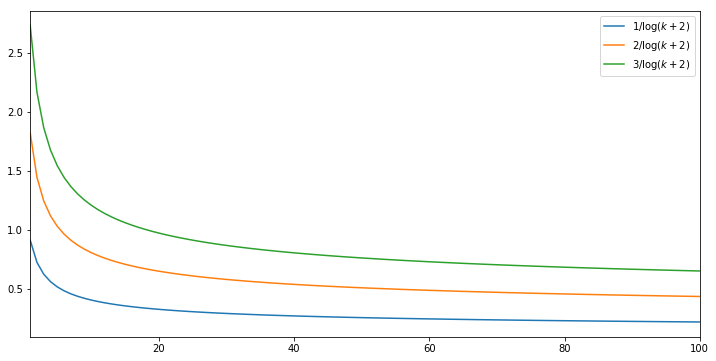

In [2]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1, 101)
ax.plot(x, 1/np.log(x + 2), label='$1/\log(k+2)$')
ax.plot(x, 2/np.log(x + 2), label='$2/\log(k+2)$')
ax.plot(x, 3/np.log(x + 2), label='$3/\log(k+2)$')
ax.set_xlim((x.min(), x.max()))
ax.legend();

---
### The Best Point So Far

The simulated annealing has the familiar form:
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{d}^{(k)}
$$

where $\mathbf{d}^{(k)}$ is randomly generated. The direction $\mathbf{d}^{(k)}$ may be:

- $\mathbf{0}$ 
- a descent direction
- an ascent direction

Since the direction of simulated annealing algorithm may be an ascent direction, it is good idea to keep track of the best point that we have seen so far; $\mathbf{x}^{(k)}_{best}$. At each iteration $k$, this point is updated as follows:

<img src="figures/lecture-11/best-so-far-point-update.png" width="600" />



---
### In-Class Pseudo Code

    def p(E_old, E_new, T):
        return exp(- (E_new - E_old)/(T) )

    def run():
        for i in range(100):
            z = NEIGHBOUR(x)

            # If we don't find any improvement in the cost
            # in a number of iterations, then stop

            T_new = T_old * 0.75

            if p(E_old, E_new, T_new) > RANDOM:
                x_kp1 = z
            else
                x_kp1 = x

            T_old = T_new


---
## Particle Swarm Optimisation (PSO)

The PSO algorithm differs from the randomized search methods in one key way: Instead of updating a single candidate solution $\mathbf{z}^{(k)}$ at each iteration $k$, we update a population (set) of candidate solutions, called a **swarm**. Each candidate solution in the swarm is called a **particle**.

Here are the key ideas:
- Each particle keeps track of its so-called personal best (**pbest**). This is the best position that the particle has visited so far (with respect to the value of the objective function).
- The swarm keeps track of the global best (**gbest**). This  is an overall best-so-far position that is a position that is best among all the positions encountered so far by the entire population.
- The particles "interact" with each other by updating their velocities according to their individual personal best as well as the global best.

There are multiple version of the PSO. The book presents the gbest PSO algorithm. In the gbest version, at each iteration, the velocity of each particle is update toward a combination of its pbest and the gbest locations. The velocity is weighted by a random term, with separate random numbers being generated for velocities toward pbest and gbest locations.

<img src="figures/lecture-11/pso-algorithm-intro.png" width="600" />







The circle $\circ$ is denotes Hadamard (or Schur) product operator. This operator performs entry-by-entry multiplication of two vectors (matrices) with the same dimensions.

<img src="figures/lecture-11/pso-algorithm-steps.png" width="600" />









As usual, typical stopping criteria of the algorithm consist of reaching a certain number of iterations, or reaching a certain objective function value.
When the algorithm stops, it returns the global best (**gbest**) since this represents the position that minimiser of the objective function during the search.

The most interesting part of the algorithm is the update of the velocity and the position of each particle. The figure below illustrates how the next position of a particle is computed at each iteration:

<img src="figures/lecture-11/velocity-update-illustration.png" width="600" />









The velocity update formula consists of three terms:


<img src="figures/lecture-11/velocity-update-formula.png" width="600" />










1. The **inertia** component keeps particle moving in similar direction. The parameter $\omega$ is referred to as an inertia constant. The book recommends values that are slightly less than 1. The slides recommends a value in the range $[0.8, 1.2]$. Lower inertia constant speeds up convergence to local optima whereas a higher $\omega$ encourages exploration in the current direction.

2. The **cognitive** component is the particle's memory. It encourages a particle to go back to its best position. The parameter $c_1$ determines how much the particle is directed toward its best-so-far position. A high $c_1$ takes larger step towards best found position. Recommended range is $[0, 2]$.

3. The **social** component encourages particle to move to the swarm's best-so-far position (gbest). The parameter $c_2$ determines how much the particle is directed toward the swarm's best-so-far position. A high $c_2$ takes larger step towards that position. Recommended range is $[0, 2]$.

In [4]:
from globalsearch_pso import PSO, create_animation

In [5]:
x1, x2 = sy.symbols('x1, x2')
f1 = Func(x1**2 + x2**2, (x1, x2))

In [6]:
# For reproducibility, we seed the random number generator
np.random.seed(42)

In [7]:
pso = PSO(f1, feasible_set=[(-3, 3), (-3, 3)], num_particles=5)
result = pso.run(w=0.8, c1=2, c2=0.1, max_iterations=20)

In [8]:
result['best_fitness']

In [9]:
result['best_point']

array([-0.01873798,  0.04208771])

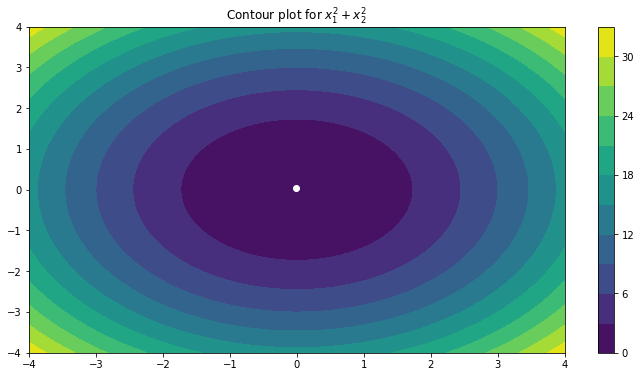

In [10]:
fig, ax = f1.plot_contour()
best_point = result['best_point']
ax.scatter(best_point[0], best_point[1], color='#ffffff')

In [11]:
create_animation(fig, ax, result, show_annotations=True)

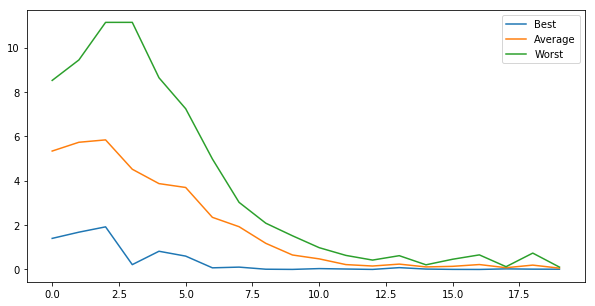

In [12]:
num_iterations = len(result['swarm'])
best_fitness = []; worst_fitness = []; avg_fitness = []
for i in range(num_iterations):
    swarm_data = result['swarm'][i]
    best_fitness.append(np.min(swarm_data['fitness']))
    worst_fitness.append(np.max(swarm_data['fitness']))
    avg_fitness.append(np.mean(swarm_data['fitness']))
x = np.arange(num_iterations)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, best_fitness, label='Best')
ax.plot(x, avg_fitness, label='Average')
ax.plot(x, worst_fitness, label='Worst')
ax.legend()